In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join('/kaggle/input/covid19-indonesia/covid_19_indonesia_time_series_all.csv'))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-indonesia/covid_19_indonesia_time_series_all.csv


In [2]:
df = pd.read_csv('../input/covid19-indonesia/covid_19_indonesia_time_series_all.csv')

In [3]:
print(df)

            Date Location ISO Code          Location  New Cases  New Deaths  \
0       3/1/2020             ID-JK       DKI Jakarta          2           0   
1       3/2/2020             ID-JK       DKI Jakarta          2           0   
2       3/2/2020               IDN         Indonesia          2           0   
3       3/2/2020             ID-RI              Riau          1           0   
4       3/3/2020             ID-JK       DKI Jakarta          2           0   
...          ...               ...               ...        ...         ...   
31817  9/15/2022             ID-SA    Sulawesi Utara         37           0   
31818  9/15/2022             ID-SB    Sumatera Barat         13           0   
31819  9/15/2022             ID-SS  Sumatera Selatan         16           0   
31820  9/15/2022             ID-SU    Sumatera Utara         50           0   
31821  9/16/2022               IDN         Indonesia       2358          27   

       New Recovered  New Active Cases  Total Cases

##Data Cleansing

In [4]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
print('Change Date Datatype')
df['Date'] = pd.to_datetime(df['Date'])

Change Date Datatype


In [7]:
print('clear NaN Value')
nan_df = df[df.isna().any(axis=1)]
nan_df.head(81)
df = df.dropna(how='all')
df.head()

clear NaN Value


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [8]:
print('drop Indonesia row')
cleaned = df.drop(df[df['Location'] == 'Indonesia'].index)

drop Indonesia row


#Exploratory Data Analysis (EDA)

In [9]:
#Import Moduls
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Total cases per province?


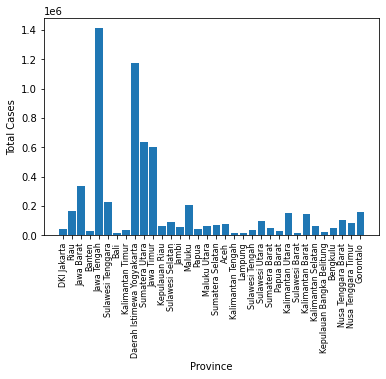

In [10]:
print('Total cases per province?')

cleaned.groupby('Location', as_index=False).sum()
import matplotlib.pyplot as plt
results = cleaned.groupby('Location').sum()
province = cleaned['Location'].unique()

plt.bar(province, results['New Cases'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Total Cases')
plt.xlabel('Province')
plt.show()

In [11]:
print('province with most cases')

df_cleaned = cleaned.groupby('Location', as_index=False).sum()
df_cleaned.head()

province with most cases


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
0,Aceh,44038,2223,41712,103,19962180,980913,17885214,1096053,0.0,...,81848.16,87607.111653,3819.955624,8392.31,3804307.45,423.26,186938.62,18693.55,1162.55,858.80
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21
2,Banten,333875,2945,328372,2558,100598017,1426619,95323211,3848187,0.0,...,1025307.36,98044.719973,-5966.024423,31138.29,9382065.69,274.50,133050.43,13305.12,1241.61,861.08
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31
4,DKI Jakarta,1412474,15493,1386059,10922,545806047,7672746,526474096,11659205,0.0,...,15174573.99,99250.753901,-5764.165363,130228.19,50322584.43,1428.22,707416.85,70741.42,1122.70,978.50


In [12]:
df_cleaned.sort_values(by=['New Cases'], ascending=False)

,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
4,DKI Jakarta,1412474,15493,1386059,10922,545806047,7672746,526474096,11659205,0.0,...,15174573.99,99250.753901,-5764.165363,130228.19,50322584.43,1428.22,707416.85,70741.42,1122.70,978.50
8,Jawa Barat,1173731,15937,1144298,13496,439196053,7097250,412874932,19223871,0.0,...,1183361.85,99748.637594,-6415.240541,25989.39,9725048.04,352.27,157153.07,15715.09,1164.95,1045.15
9,Jawa Tengah,636409,33480,601506,1423,273046506,14972030,246232049,11842427,0.0,...,1022166.08,101605.427938,-6692.887597,17500.13,7508688.80,919.87,411725.59,41172.53,1077.01,1185.41
10,Jawa Timur,601534,31732,568666,1136,239912685,15384287,220227772,4300626,0.0,...,772263.36,102812.442557,-7043.691168,14860.30,5926839.78,783.16,380055.65,38005.69,1023.62,915.88
2,Banten,333875,2945,328372,2558,100598017,1426619,95323211,3848187,0.0,...,1025307.36,98044.719973,-5966.024423,31138.29,9382065.69,274.50,133050.43,13305.12,1241.61,861.08
5,Daerah Istimewa Yogyakarta,224307,5928,217710,669,86090207,2484820,79579777,4025610,0.0,...,1059234.60,100946.618766,-7215.574691,61775.58,23709680.90,1633.28,684331.91,68433.22,1116.74,844.95
14,Kalimantan Timur,209017,5726,203019,272,89582475,2644808,84393243,2544424,0.0,...,25208.32,106685.091498,415.733955,58841.63,25218935.15,1611.72,744556.76,74455.66,1125.33,1002.59
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21
33,Sumatera Utara,158866,3288,154914,664,60912221,1505029,56578513,2828679,0.0,...,186087.66,90434.443515,2001.199636,10680.02,4094969.80,221.03,101179.25,10117.86,1081.30,905.16
25,Riau,152648,4452,147972,224,68594950,2012582,64845902,1736466,0.0,...,64774.40,94475.141338,474.809206,25130.54,11293022.77,732.31,331338.30,33134.04,984.66,921.52


##DKI Jakarta

In [13]:
print('province with lowest cases?')

df_cleaned.sort_values(by=['New Cases'], ascending=True)

province with lowest cases?


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
6,Gorontalo,13951,487,13433,31,6746166,233646,6321551,190969,0.0,...,93133.44,108669.939593,610.058312,11816.28,5713937.68,412.64,197896.35,19789.53,1150.40,678.59
20,Maluku Utara,14595,334,14247,14,6781984,167511,6292555,321918,0.0,...,37087.23,115677.970230,192.317513,11159.42,5185783.88,254.96,128085.96,12808.62,1096.95,746.78
26,Sulawesi Barat,15601,394,15201,6,6865029,171685,6424365,268979,0.0,...,83729.93,107529.862479,-2218.033194,10000.47,4400704.99,252.29,110055.92,11005.45,1252.63,777.50
19,Maluku,18736,294,18393,49,9046656,147196,8426837,472623,0.0,...,35747.96,117655.727136,-2898.855376,10143.31,4897769.52,158.92,79690.83,7968.72,1143.68,682.44
29,Sulawesi Tenggara,25693,569,25090,34,12244125,277370,11451150,515605,0.0,...,63691.60,112304.686120,-3794.713690,9749.29,4645914.12,216.19,105245.40,10524.18,1291.42,731.30
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31
24,Papua Barat,32170,384,31649,137,13634548,189579,13026225,418744,0.0,...,10005.24,120077.564947,-1846.779644,28202.14,11952779.75,336.93,166196.44,16619.69,1404.05,704.54
21,Nusa Tenggara Barat,36247,902,35330,15,15887423,461859,14725384,700180,0.0,...,255109.23,105640.254504,-7737.691981,6877.87,3014549.91,171.37,87635.01,8763.83,1203.79,712.63
7,Jambi,38643,889,37677,77,15700629,366115,14664021,670493,0.0,...,63508.90,93478.512764,-1544.904871,11062.18,4494424.49,254.82,104803.33,10480.63,1009.11,776.95
0,Aceh,44038,2223,41712,103,19962180,980913,17885214,1096053,0.0,...,81848.16,87607.111653,3819.955624,8392.31,3804307.45,423.26,186938.62,18693.55,1162.55,858.80


Gorontalo

Total death per province?


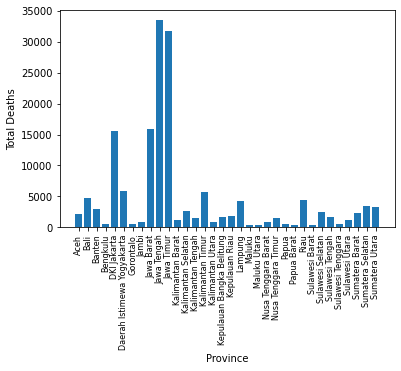

In [14]:
print('Total death per province?')

import matplotlib.pyplot as plt
results = df_cleaned.groupby('Location').sum()
province = df_cleaned['Location'].unique()

plt.bar(province, results['New Deaths'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Total Deaths')
plt.xlabel('Province')
plt.show()

In [15]:
print('province with highest death')

sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['New Deaths'], ascending=False)

province with highest death


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
9,Jawa Tengah,636409,33480,601506,1423,273046506,14972030,246232049,11842427,0.0,...,1022166.08,101605.427938,-6692.887597,17500.13,7508688.80,919.87,411725.59,41172.53,1077.01,1185.41
10,Jawa Timur,601534,31732,568666,1136,239912685,15384287,220227772,4300626,0.0,...,772263.36,102812.442557,-7043.691168,14860.30,5926839.78,783.16,380055.65,38005.69,1023.62,915.88
8,Jawa Barat,1173731,15937,1144298,13496,439196053,7097250,412874932,19223871,0.0,...,1183361.85,99748.637594,-6415.240541,25989.39,9725048.04,352.27,157153.07,15715.09,1164.95,1045.15
4,DKI Jakarta,1412474,15493,1386059,10922,545806047,7672746,526474096,11659205,0.0,...,15174573.99,99250.753901,-5764.165363,130228.19,50322584.43,1428.22,707416.85,70741.42,1122.70,978.50
5,Daerah Istimewa Yogyakarta,224307,5928,217710,669,86090207,2484820,79579777,4025610,0.0,...,1059234.60,100946.618766,-7215.574691,61775.58,23709680.90,1633.28,684331.91,68433.22,1116.74,844.95
14,Kalimantan Timur,209017,5726,203019,272,89582475,2644808,84393243,2544424,0.0,...,25208.32,106685.091498,415.733955,58841.63,25218935.15,1611.72,744556.76,74455.66,1125.33,1002.59
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21
25,Riau,152648,4452,147972,224,68594950,2012582,64845902,1736466,0.0,...,64774.40,94475.141338,474.809206,25130.54,11293022.77,732.31,331338.30,33134.04,984.66,921.52
18,Lampung,75485,4186,71073,226,28891786,1796384,25499912,1595490,0.0,...,237480.80,94939.378686,-4444.780849,8299.58,3176460.47,460.39,197500.23,19749.61,1040.12,973.95
32,Sumatera Selatan,82198,3376,78509,313,34483096,1582127,31611568,1289401,0.0,...,81376.04,94481.704483,-2917.104110,10002.86,4196273.89,411.02,192530.04,19253.04,1029.32,914.55


Jawa Tengah

In [16]:
print('province with lowest deaths?')

sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['Total Deaths'], ascending=True)

province with lowest deaths?


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
19,Maluku,18736,294,18393,49,9046656,147196,8426837,472623,0.0,...,35747.96,117655.727136,-2898.855376,10143.31,4897769.52,158.92,79690.83,7968.72,1143.68,682.44
20,Maluku Utara,14595,334,14247,14,6781984,167511,6292555,321918,0.0,...,37087.23,115677.970230,192.317513,11159.42,5185783.88,254.96,128085.96,12808.62,1096.95,746.78
26,Sulawesi Barat,15601,394,15201,6,6865029,171685,6424365,268979,0.0,...,83729.93,107529.862479,-2218.033194,10000.47,4400704.99,252.29,110055.92,11005.45,1252.63,777.50
24,Papua Barat,32170,384,31649,137,13634548,189579,13026225,418744,0.0,...,10005.24,120077.564947,-1846.779644,28202.14,11952779.75,336.93,166196.44,16619.69,1404.05,704.54
6,Gorontalo,13951,487,13433,31,6746166,233646,6321551,190969,0.0,...,93133.44,108669.939593,610.058312,11816.28,5713937.68,412.64,197896.35,19789.53,1150.40,678.59
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31
29,Sulawesi Tenggara,25693,569,25090,34,12244125,277370,11451150,515605,0.0,...,63691.60,112304.686120,-3794.713690,9749.29,4645914.12,216.19,105245.40,10524.18,1291.42,731.30
23,Papua,49927,579,49111,237,22285548,298712,18097409,3889427,0.0,...,12348.80,125935.995240,-4236.918253,11502.66,5134507.31,133.23,68821.74,6881.57,1283.67,738.89
7,Jambi,38643,889,37677,77,15700629,366115,14664021,670493,0.0,...,63508.90,93478.512764,-1544.904871,11062.18,4494424.49,254.82,104803.33,10480.63,1009.11,776.95
15,Kalimantan Utara,45417,860,44530,27,18782628,368176,17503595,910857,0.0,...,7748.18,104829.428948,2607.693384,70043.56,28967342.86,1326.01,567816.12,56781.52,1003.77,755.34


Maluku

Total Recovered per province


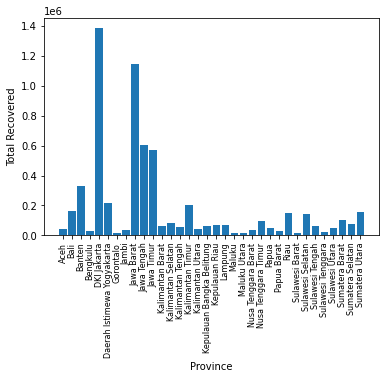

In [17]:
print('Total Recovered per province')

import matplotlib.pyplot as plt
results = df_cleaned.groupby('Location').sum()
province = df_cleaned['Location'].unique()

plt.bar(province, results['New Recovered'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Total Recovered')
plt.xlabel('Province')
plt.show()

In [18]:
print('province with most total recovered')

sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['New Recovered'], ascending=False)

province with most total recovered


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
4,DKI Jakarta,1412474,15493,1386059,10922,545806047,7672746,526474096,11659205,0.0,...,15174573.99,99250.753901,-5764.165363,130228.19,50322584.43,1428.22,707416.85,70741.42,1122.70,978.50
8,Jawa Barat,1173731,15937,1144298,13496,439196053,7097250,412874932,19223871,0.0,...,1183361.85,99748.637594,-6415.240541,25989.39,9725048.04,352.27,157153.07,15715.09,1164.95,1045.15
9,Jawa Tengah,636409,33480,601506,1423,273046506,14972030,246232049,11842427,0.0,...,1022166.08,101605.427938,-6692.887597,17500.13,7508688.80,919.87,411725.59,41172.53,1077.01,1185.41
10,Jawa Timur,601534,31732,568666,1136,239912685,15384287,220227772,4300626,0.0,...,772263.36,102812.442557,-7043.691168,14860.30,5926839.78,783.16,380055.65,38005.69,1023.62,915.88
2,Banten,333875,2945,328372,2558,100598017,1426619,95323211,3848187,0.0,...,1025307.36,98044.719973,-5966.024423,31138.29,9382065.69,274.50,133050.43,13305.12,1241.61,861.08
5,Daerah Istimewa Yogyakarta,224307,5928,217710,669,86090207,2484820,79579777,4025610,0.0,...,1059234.60,100946.618766,-7215.574691,61775.58,23709680.90,1633.28,684331.91,68433.22,1116.74,844.95
14,Kalimantan Timur,209017,5726,203019,272,89582475,2644808,84393243,2544424,0.0,...,25208.32,106685.091498,415.733955,58841.63,25218935.15,1611.72,744556.76,74455.66,1125.33,1002.59
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21
33,Sumatera Utara,158866,3288,154914,664,60912221,1505029,56578513,2828679,0.0,...,186087.66,90434.443515,2001.199636,10680.02,4094969.80,221.03,101179.25,10117.86,1081.30,905.16
25,Riau,152648,4452,147972,224,68594950,2012582,64845902,1736466,0.0,...,64774.40,94475.141338,474.809206,25130.54,11293022.77,732.31,331338.30,33134.04,984.66,921.52


DKI Jakarta

In [19]:
print('province with lowest total recovered')
sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['New Recovered'], ascending=True)

province with lowest total recovered


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
6,Gorontalo,13951,487,13433,31,6746166,233646,6321551,190969,0.0,...,93133.44,108669.939593,610.058312,11816.28,5713937.68,412.64,197896.35,19789.53,1150.40,678.59
20,Maluku Utara,14595,334,14247,14,6781984,167511,6292555,321918,0.0,...,37087.23,115677.970230,192.317513,11159.42,5185783.88,254.96,128085.96,12808.62,1096.95,746.78
26,Sulawesi Barat,15601,394,15201,6,6865029,171685,6424365,268979,0.0,...,83729.93,107529.862479,-2218.033194,10000.47,4400704.99,252.29,110055.92,11005.45,1252.63,777.50
19,Maluku,18736,294,18393,49,9046656,147196,8426837,472623,0.0,...,35747.96,117655.727136,-2898.855376,10143.31,4897769.52,158.92,79690.83,7968.72,1143.68,682.44
29,Sulawesi Tenggara,25693,569,25090,34,12244125,277370,11451150,515605,0.0,...,63691.60,112304.686120,-3794.713690,9749.29,4645914.12,216.19,105245.40,10524.18,1291.42,731.30
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31
24,Papua Barat,32170,384,31649,137,13634548,189579,13026225,418744,0.0,...,10005.24,120077.564947,-1846.779644,28202.14,11952779.75,336.93,166196.44,16619.69,1404.05,704.54
21,Nusa Tenggara Barat,36247,902,35330,15,15887423,461859,14725384,700180,0.0,...,255109.23,105640.254504,-7737.691981,6877.87,3014549.91,171.37,87635.01,8763.83,1203.79,712.63
7,Jambi,38643,889,37677,77,15700629,366115,14664021,670493,0.0,...,63508.90,93478.512764,-1544.904871,11062.18,4494424.49,254.82,104803.33,10480.63,1009.11,776.95
0,Aceh,44038,2223,41712,103,19962180,980913,17885214,1096053,0.0,...,81848.16,87607.111653,3819.955624,8392.31,3804307.45,423.26,186938.62,18693.55,1162.55,858.80


Gorontalo

growth factor of new cases per province


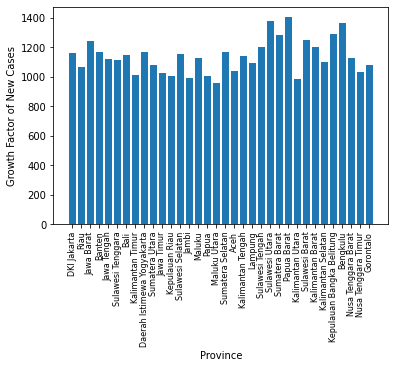

In [20]:
print('growth factor of new cases per province')

import matplotlib.pyplot as plt
results = cleaned.groupby('Location').sum()
province = cleaned['Location'].unique()

plt.bar(province, results['Growth Factor of New Cases'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Growth Factor of New Cases')
plt.xlabel('Province')
plt.show()

In [21]:
print('highest growth rate')
sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['Growth Factor of New Cases'], ascending=False)

highest growth rate


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
24,Papua Barat,32170,384,31649,137,13634548,189579,13026225,418744,0.0,...,10005.24,120077.564947,-1846.779644,28202.14,11952779.75,336.93,166196.44,16619.69,1404.05,704.54
22,Nusa Tenggara Timur,94415,1527,92786,102,34710372,643303,32822985,1244084,0.0,...,98852.30,108217.121190,-7727.162450,17447.32,6414398.89,281.31,118880.48,11888.18,1379.84,826.76
30,Sulawesi Utara,52770,1212,50993,565,21715953,595956,19979423,1140574,0.0,...,171913.68,112567.200598,1138.712944,19974.55,8219873.89,459.24,225579.57,22558.02,1364.81,747.54
29,Sulawesi Tenggara,25693,569,25090,34,12244125,277370,11451150,515605,0.0,...,63691.60,112304.686120,-3794.713690,9749.29,4645914.12,216.19,105245.40,10524.18,1291.42,731.30
23,Papua,49927,579,49111,237,22285548,298712,18097409,3889427,0.0,...,12348.80,125935.995240,-4236.918253,11502.66,5134507.31,133.23,68821.74,6881.57,1283.67,738.89
26,Sulawesi Barat,15601,394,15201,6,6865029,171685,6424365,268979,0.0,...,83729.93,107529.862479,-2218.033194,10000.47,4400704.99,252.29,110055.92,11005.45,1252.63,777.50
2,Banten,333875,2945,328372,2558,100598017,1426619,95323211,3848187,0.0,...,1025307.36,98044.719973,-5966.024423,31138.29,9382065.69,274.50,133050.43,13305.12,1241.61,861.08
21,Nusa Tenggara Barat,36247,902,35330,15,15887423,461859,14725384,700180,0.0,...,255109.23,105640.254504,-7737.691981,6877.87,3014549.91,171.37,87635.01,8763.83,1203.79,712.63
27,Sulawesi Selatan,144494,2485,141856,153,66922249,1216927,63624765,2080557,0.0,...,183821.58,109467.632925,-3399.014530,15327.67,7099084.05,263.82,129091.18,12908.90,1200.97,799.79
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31


Papua Barat

In [22]:
print('lowest growth rate')
sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['Growth Factor of New Cases'], ascending=True)

lowest growth rate


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
16,Kepulauan Bangka Belitung,66144,1616,64455,73,26613493,653462,25258419,701612,0.0,...,75609.00,95894.939160,-2202.699714,47938.02,19288396.45,1170.41,473602.89,47359.72,960.45,770.90
25,Riau,152648,4452,147972,224,68594950,2012582,64845902,1736466,0.0,...,64774.40,94475.141338,474.809206,25130.54,11293022.77,732.31,331338.30,33134.04,984.66,921.52
13,Kalimantan Tengah,58217,1563,56434,220,25507275,711703,23584893,1210679,0.0,...,15132.96,102529.558854,-1448.646126,22650.29,9923893.86,608.66,276895.75,27689.52,989.29,687.00
11,Kalimantan Barat,65605,1130,64369,106,23403342,467224,22321103,615015,0.0,...,33165.81,100120.181018,-77.913589,12097.82,4315719.11,208.04,86159.19,8615.59,1002.91,788.82
15,Kalimantan Utara,45417,860,44530,27,18782628,368176,17503595,910857,0.0,...,7748.18,104829.428948,2607.693384,70043.56,28967342.86,1326.01,567816.12,56781.52,1003.77,755.34
7,Jambi,38643,889,37677,77,15700629,366115,14664021,670493,0.0,...,63508.90,93478.512764,-1544.904871,11062.18,4494424.49,254.82,104803.33,10480.63,1009.11,776.95
10,Jawa Timur,601534,31732,568666,1136,239912685,15384287,220227772,4300626,0.0,...,772263.36,102812.442557,-7043.691168,14860.30,5926839.78,783.16,380055.65,38005.69,1023.62,915.88
32,Sumatera Selatan,82198,3376,78509,313,34483096,1582127,31611568,1289401,0.0,...,81376.04,94481.704483,-2917.104110,10002.86,4196273.89,411.02,192530.04,19253.04,1029.32,914.55
18,Lampung,75485,4186,71073,226,28891786,1796384,25499912,1595490,0.0,...,237480.80,94939.378686,-4444.780849,8299.58,3176460.47,460.39,197500.23,19749.61,1040.12,973.95
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21


Kepulauan bangka belitung

growth factor of new deaths per province


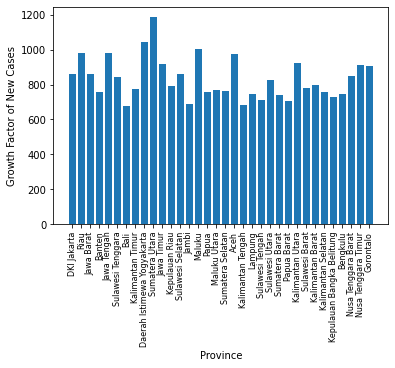

In [23]:
print('growth factor of new deaths per province')

import matplotlib.pyplot as plt
results = cleaned.groupby('Location').sum()
province = cleaned['Location'].unique()

plt.bar(province, results['Growth Factor of New Deaths'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Growth Factor of New Cases')
plt.xlabel('Province')
plt.show()

In [24]:
print('highest growth factor of new deaths')

sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['Growth Factor of New Deaths'], ascending=False)

highest growth factor of new deaths


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
9,Jawa Tengah,636409,33480,601506,1423,273046506,14972030,246232049,11842427,0.0,...,1022166.08,101605.427938,-6692.887597,17500.13,7508688.80,919.87,411725.59,41172.53,1077.01,1185.41
8,Jawa Barat,1173731,15937,1144298,13496,439196053,7097250,412874932,19223871,0.0,...,1183361.85,99748.637594,-6415.240541,25989.39,9725048.04,352.27,157153.07,15715.09,1164.95,1045.15
14,Kalimantan Timur,209017,5726,203019,272,89582475,2644808,84393243,2544424,0.0,...,25208.32,106685.091498,415.733955,58841.63,25218935.15,1611.72,744556.76,74455.66,1125.33,1002.59
1,Bali,166831,4731,161626,474,66247623,2017352,62075015,2155256,0.0,...,670346.17,105806.044798,-7691.544481,39569.36,15712745.83,1122.08,478479.40,47848.20,1068.77,982.21
4,DKI Jakarta,1412474,15493,1386059,10922,545806047,7672746,526474096,11659205,0.0,...,15174573.99,99250.753901,-5764.165363,130228.19,50322584.43,1428.22,707416.85,70741.42,1122.70,978.50
18,Lampung,75485,4186,71073,226,28891786,1796384,25499912,1595490,0.0,...,237480.80,94939.378686,-4444.780849,8299.58,3176460.47,460.39,197500.23,19749.61,1040.12,973.95
25,Riau,152648,4452,147972,224,68594950,2012582,64845902,1736466,0.0,...,64774.40,94475.141338,474.809206,25130.54,11293022.77,732.31,331338.30,33134.04,984.66,921.52
10,Jawa Timur,601534,31732,568666,1136,239912685,15384287,220227772,4300626,0.0,...,772263.36,102812.442557,-7043.691168,14860.30,5926839.78,783.16,380055.65,38005.69,1023.62,915.88
32,Sumatera Selatan,82198,3376,78509,313,34483096,1582127,31611568,1289401,0.0,...,81376.04,94481.704483,-2917.104110,10002.86,4196273.89,411.02,192530.04,19253.04,1029.32,914.55
33,Sumatera Utara,158866,3288,154914,664,60912221,1505029,56578513,2828679,0.0,...,186087.66,90434.443515,2001.199636,10680.02,4094969.80,221.03,101179.25,10117.86,1081.30,905.16


Jawa Tengah

In [25]:
print('lowest growth factor of new deaths')\

sort = cleaned.groupby('Location', as_index=False).sum()
sort.sort_values(by=['Growth Factor of New Deaths'], ascending=True)

lowest growth factor of new deaths


,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
6,Gorontalo,13951,487,13433,31,6746166,233646,6321551,190969,0.0,...,93133.44,108669.939593,610.058312,11816.28,5713937.68,412.64,197896.35,19789.53,1150.40,678.59
19,Maluku,18736,294,18393,49,9046656,147196,8426837,472623,0.0,...,35747.96,117655.727136,-2898.855376,10143.31,4897769.52,158.92,79690.83,7968.72,1143.68,682.44
13,Kalimantan Tengah,58217,1563,56434,220,25507275,711703,23584893,1210679,0.0,...,15132.96,102529.558854,-1448.646126,22650.29,9923893.86,608.66,276895.75,27689.52,989.29,687.00
24,Papua Barat,32170,384,31649,137,13634548,189579,13026225,418744,0.0,...,10005.24,120077.564947,-1846.779644,28202.14,11952779.75,336.93,166196.44,16619.69,1404.05,704.54
21,Nusa Tenggara Barat,36247,902,35330,15,15887423,461859,14725384,700180,0.0,...,255109.23,105640.254504,-7737.691981,6877.87,3014549.91,171.37,87635.01,8763.83,1203.79,712.63
29,Sulawesi Tenggara,25693,569,25090,34,12244125,277370,11451150,515605,0.0,...,63691.60,112304.686120,-3794.713690,9749.29,4645914.12,216.19,105245.40,10524.18,1291.42,731.30
23,Papua,49927,579,49111,237,22285548,298712,18097409,3889427,0.0,...,12348.80,125935.995240,-4236.918253,11502.66,5134507.31,133.23,68821.74,6881.57,1283.67,738.89
20,Maluku Utara,14595,334,14247,14,6781984,167511,6292555,321918,0.0,...,37087.23,115677.970230,192.317513,11159.42,5185783.88,254.96,128085.96,12808.62,1096.95,746.78
30,Sulawesi Utara,52770,1212,50993,565,21715953,595956,19979423,1140574,0.0,...,171913.68,112567.200598,1138.712944,19974.55,8219873.89,459.24,225579.57,22558.02,1364.81,747.54
3,Bengkulu,29173,522,28617,34,12347482,243057,11642598,461827,0.0,...,90241.62,92002.240749,-3176.691681,14589.40,6175164.26,261.00,121555.87,12156.67,1166.96,755.31


Gorontalo

In [26]:
print('COVID-19 Cases Trend in Indonesia')
import datetime
cleaned['mnth_yr'] = cleaned['Date'].apply(lambda x: x.strftime('%B-%Y')) 
cleaned.head()

COVID-19 Cases Trend in Indonesia


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,mnth_yr
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN,March-2020
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0,1.0,March-2020
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN,March-2020
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0,1.0,March-2020
6,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN,March-2020


COVID-19 Cases Trends


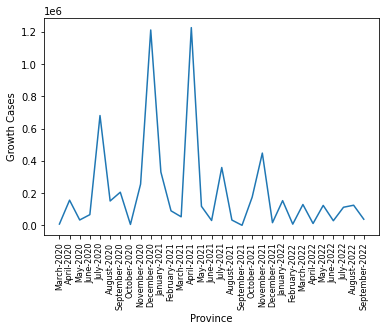

In [27]:
print('COVID-19 Cases Trends')
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
results = cleaned.groupby('mnth_yr').sum()
province = cleaned['mnth_yr'].unique()

plt.plot(province, results['New Cases'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Growth Cases')
plt.xlabel('Province')
plt.show()

COVID-19 Deaths Trends


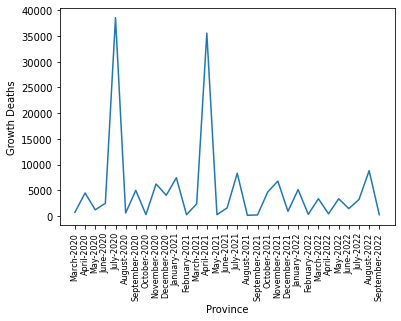

In [28]:
print('COVID-19 Deaths Trends')
import matplotlib.pyplot as plt
results = cleaned.groupby('mnth_yr').sum()
province = cleaned['mnth_yr'].unique()

plt.plot(province, results['New Deaths'])
plt.xticks(province, rotation = 'vertical', size = 8)
plt.ylabel('Growth Deaths')
plt.xlabel('Province')
plt.show()